# Betty Zhang

## Research question/interests

### How can banks minimize credit risk and maximize benefits when determining credit limits for clients, considering factors such as gender, age, education, marital status, payment behaviour, and credit utilization patterns?

#####     The motivation for selecting this dataset originated from a conversation with a bank advisor who recommended keeping my spending below half of my credit limit. For instance, if my monthly credit limit is 3,000 dollars, I should strive to keep my expenses under 1,500 dollars per month. This conversation piqued my curiosity about how banks determine credit limits. Since credit is an essential component when making significant purchases like homes, cars, and education, understanding the factors that banks consider when setting credit limits is crucial. 

#####     Despite credit cards benefiting users, it is important to recognize that banks issue them because they can be profitable. As the fundamental concept behind credit is to loan money, inherent risks exist. Therefore, utilizing the given dataset, I aim to explore several sub-questions from a bank’s perspective:

##### 1. To gain insight into credit limit determination from a bank’s perspective, I plan to investigate whether gender, age, education, and marital status impact available credit. Specifically, I aim to identify whether certain demographics should be granted higher credit limits and determine if any correlations exist between these variables and available credit. I will analyze each variable against available credit, examining factors such as whether gender influences credit availability and if elder individuals tend to have higher credit limits. Subsequently, I will combine and group these sub-comparisons to identify any relationships that may exist. 
##### 2. I will explore whether credit utilization patterns impact credit availability by comparing individuals with similar bills but differing bill payment patterns throughout the research period. While it is clear that payment behaviour influences credit availability, I aim to identify any correlation between the number of late payments and available credit, considering that unexpected circumstances may impact one’s ability to make payments on time.
##### 3. I plan to investigate how a client’s previous payment behaviour, such as only making minimum or partial bill payments, may affect credit availability. This will enable me to assess how banks should consider the associated risk. 


In [368]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [369]:
# Import Dataset
df =pd.read_excel(io=r'../data/raw/default of credit card clients.xls')
df.drop("Unnamed: 0",axis=1)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Milestone 2 Task 1

In [370]:
# get the demension of the dataset (num of rows, num of cols)
df.shape

(30001, 25)

In [371]:
# get the first 5 rows of the dataset (in order to see some sample values for each variable)
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [372]:
# get the name of all of the columns in the dataset
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [373]:
# convert the 1st row to column header (since the column headers are Xi which is hard to define their meaning)
df1 = df.rename(columns=df.iloc[0])

In [374]:
# drop the first row and reset the index
df2 = df1.iloc[1:].reset_index()
df = df2
df

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29996,220000,1,3,1,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,29997,150000,1,3,2,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,29998,30000,1,2,2,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,29999,80000,1,3,1,41,1,-1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [375]:
# check the variables' types
df.dtypes

index                          int64
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [376]:
# summarize the count, mean, std, min, max for numeric variables
df.describe(include = [np.number])

,index
count,30000.000000
mean,15000.500000
std,8660.398374
min,1.000000
25%,7500.750000
50%,15000.500000
75%,22500.250000
max,30000.000000


In [377]:
# summarize the count, unique, top and frequency for categorical variables
df.describe(exclude = [np.number]).T

,count,unique,top,freq
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764
PAY_4,30000,11,0,16455


In [378]:
# convert the object variables into numberical variables
df1 = df.apply(pd.to_numeric)
df = df1

In [379]:
# check the type of each columns to make sure the conversion is correct
df.dtypes

index                         int64
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [380]:
#summarize the count, mean, std, min, max for the data set
df.describe()

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [381]:
# get the number of unique values for each variable
df.nunique(axis = 0)

index                         30000
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [382]:
# Removing rows with null values
df_cleaned = df.dropna(axis = 0)
df_cleaned = df_cleaned.drop(columns = 'index')
df_cleaned

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [383]:
# Removing the unexpected values (for example, "education" has 1 to 4, however in the data set, there were 5 and 6)
df = df.drop(df.loc[df['EDUCATION'] ==5].index, inplace = True)
df

[Text(0, 0.5, '')]

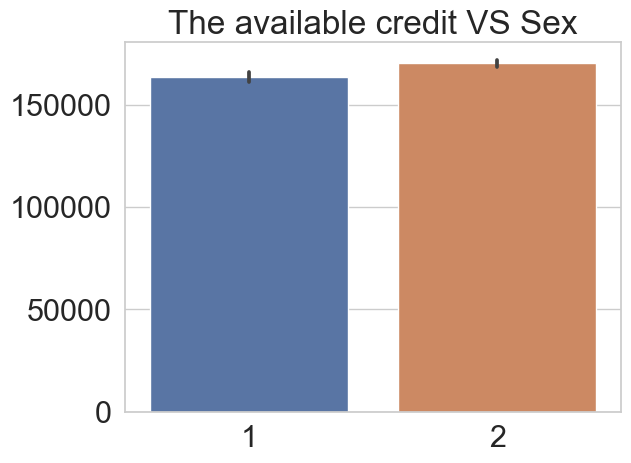

In [384]:
sns.set_theme(style = "whitegrid", font_scale = 2)
limit_sex = sns.barplot(data = df_cleaned, x = 'SEX', y = 'LIMIT_BAL')
limit_sex.set(title = 'The available credit VS Sex')
limit_sex.set(xlabel = None)
limit_sex.set(ylabel = None)

[Text(0, 0.5, '')]

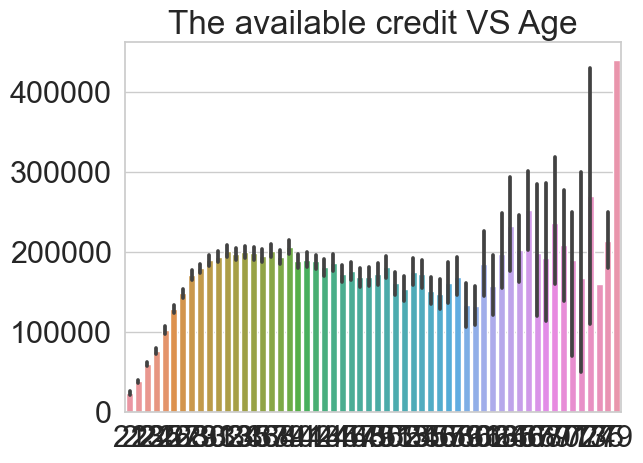

In [385]:
limit_age = sns.barplot(data = df_cleaned, x = 'AGE', y = 'LIMIT_BAL')
limit_age.set(title = 'The available credit VS Age')
limit_age.set(xlabel = None)
limit_age.set(ylabel = None)

[Text(0, 0.5, '')]

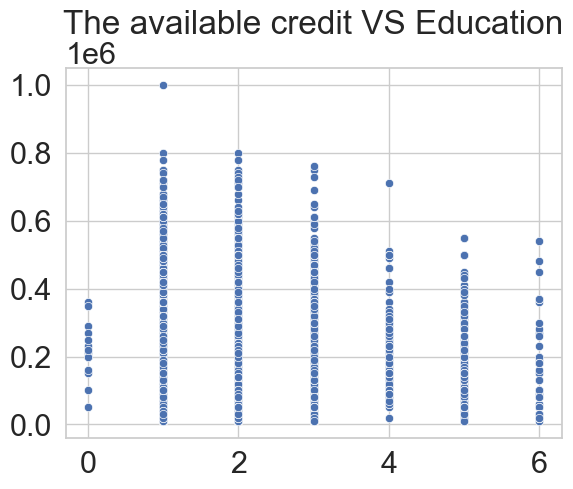

In [386]:
limit_edu = sns.scatterplot(data = df_cleaned, x = 'EDUCATION', y = 'LIMIT_BAL')
limit_edu.set(title = 'The available credit VS Education')
limit_edu.set(xlabel = None)
limit_edu.set(ylabel = None)

[Text(0, 0.5, '')]

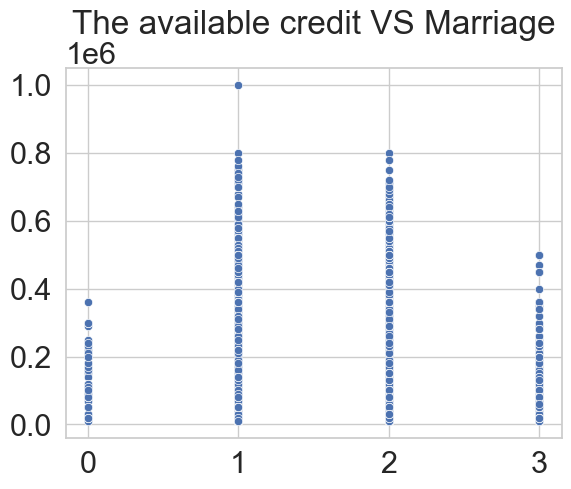

In [387]:
limit_mar = sns.scatterplot(data = df_cleaned, x = 'MARRIAGE', y = 'LIMIT_BAL')
limit_mar.set(title = 'The available credit VS Marriage')
limit_mar.set(xlabel = None)
limit_mar.set(ylabel = None)

In [416]:
# Create new columns to ovserve the payment behaviour
df_cleaned['PB1'] = df_cleaned['PAY_AMT1']-df_cleaned['BILL_AMT1']
df_cleaned['PB2'] = df_cleaned['PAY_AMT2']-df_cleaned['BILL_AMT2']
df_cleaned['PB3'] = df_cleaned['PAY_AMT3']-df_cleaned['BILL_AMT3']
df_cleaned['PB4'] = df_cleaned['PAY_AMT4']-df_cleaned['BILL_AMT4']
df_cleaned['PB5'] = df_cleaned['PAY_AMT5']-df_cleaned['BILL_AMT5']
df_cleaned['PB6'] = df_cleaned['PAY_AMT6']-df_cleaned['BILL_AMT6']
df_cleaned

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PB1,PB2,PB3,PB4,PB5,PB6
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,-3913,-2413,-689,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,-2682,-725,-1682,-2272,-3455,-1261
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,-27721,-12527,-12559,-13331,-13948,-10549
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,-44990,-46214,-48091,-27214,-27890,-28547
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,-6617,31011,-25835,-11940,-18457,-18452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,3047,5000,1000,0,-180448,-172815,-203362,-84957,-26237,-14980
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,129,0,0,0,154,1698,5496,-8850,-5190,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,4200,2000,3100,1,-3565,-3356,19242,-16678,-18582,-16257
29998,29999,80000,1,3,1,41,1,-1,0,0,...,1926,52964,1804,1,87545,-74970,-75126,-50848,41109,-47140


In [414]:
df_cleaned.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PB1,PB2,PB3,PB4,PB5,PB6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.00000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4826.076867,4799.387633,5215.502567,0.221200,-45559.750400,-4.325791e+04,-4.178747e+04,-38436.87210,-35512.013333,-33656.257833
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,15666.159744,15278.305679,17777.465775,0.415062,73173.789447,7.256594e+04,6.929536e+04,64200.61083,60553.370054,60151.290836
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-913727.000000,-9.332080e+05,-1.542258e+06,-841586.00000,-877171.000000,-911408.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,296.000000,252.500000,117.750000,0.000000,-62241.500000,-5.907775e+04,-5.629425e+04,-50259.50000,-46961.500000,-46067.250000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1500.000000,0.000000,-18550.500000,-1.810250e+04,-1.776900e+04,-16970.00000,-15538.000000,-13926.500000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,4013.250000,4031.500000,4000.000000,0.000000,-745.000000,-3.295000e+02,-2.627500e+02,-230.00000,0.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,621000.000000,426529.000000,528666.000000,1.000000,733744.000000,1.702347e+06,8.546410e+05,667000.00000,414380.000000,684896.000000


### Observations and Analysis
##### After extracting the basic information from the dataset, I realized that the column headers labeled as "Xi" were difficult to read. To make the dataset more readable, I changed the first row that contained all of the column names to the header and removed the first row. I noticed that all of the columns, except for the index column, were in the "object" variable type. However, for analysis and plotting purposes, I needed the variables to be in numeric format. Therefore, I converted the entire dataset into a numeric type. I created several plots to show the correlation between age, education, marital status, gender, and available credit. Additionally, I used the describe() function to extract statistical information, such as the average, minimum, maximum, standard deviation, etc., for each column.Finally, I created new columns to answer additional questions.

### Refine Research Question
#### How can banks minimize credit risk and maximize benefits when determining credit limits for clients, considering factors such as gender, age, education, marital status, payment behaviour, and credit utilization patterns?
##### After doing the EDA, my research questions are not been answered yet. I still need to have more plots with the new columns I created and maybe I need more col